In [1]:
import numpy as np
import matplotlib.pyplot as plt

from garuda.ops import geo_to_webm, webm_to_geo
from garuda.od import yolo_aa_to_geo
from garuda.plot import plot_webm_to_geo

Specify the config

In [2]:
img_center_lon = 87.93
img_center_lat = 22.32
zoom = 17
image_path = f"../data/{img_center_lat},{img_center_lon}.png"
aa_label_path = f"../data/{img_center_lat},{img_center_lon}_aa.txt"
obb_label_path = f"../data/{img_center_lat},{img_center_lon}_obb.txt"

### Get the geo-locations of the objects from yolo predictions

In [3]:
img = plt.imread(image_path)
aa_yolo_lables = np.loadtxt(aa_label_path, ndmin=2)
bbox_geo = yolo_aa_to_geo(aa_yolo_lables, zoom, img_center_lat, img_center_lon, img.shape[0], img.shape[1])
print(bbox_geo)

[[ 1.         22.32520659 87.93496674]
 [ 1.         22.32360895 87.93237122]
 [ 1.         22.322238   87.93288391]
 [ 1.         22.32071142 87.92991989]
 [ 1.         22.32133391 87.93233917]
 [ 1.         22.31762116 87.93244331]
 [ 1.         22.31710981 87.93048866]
 [ 1.         22.3167615  87.93194664]
 [ 1.         22.31516075 87.92982376]]


In [4]:
img = plt.imread(image_path)
obb_yolo_lables = np.loadtxt(aa_label_path, ndmin=2)
bbox_geo = yolo_aa_to_geo(obb_yolo_lables, zoom, img_center_lat, img_center_lon, img.shape[0], img.shape[1])
print(bbox_geo)

[[ 1.         22.32520659 87.93496674]
 [ 1.         22.32360895 87.93237122]
 [ 1.         22.322238   87.93288391]
 [ 1.         22.32071142 87.92991989]
 [ 1.         22.32133391 87.93233917]
 [ 1.         22.31762116 87.93244331]
 [ 1.         22.31710981 87.93048866]
 [ 1.         22.3167615  87.93194664]
 [ 1.         22.31516075 87.92982376]]


### Plot the geo-locations on the map

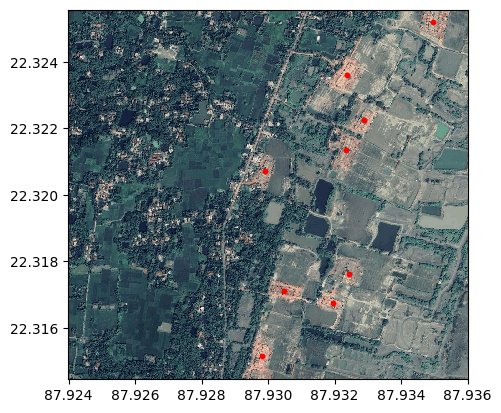

In [5]:
fig, ax = plt.subplots()
plot_webm_to_geo(img, img_center_lat, img_center_lon, zoom, ax)

lons = bbox_geo[:, 2]
lats = bbox_geo[:, 1]

plt.scatter(lons, lats, c='r', s=10)